
# Regression Models


<br>Reference:
<br>https://www.kaggle.com/alexzhuzk/linear-xgb-regression-novice
<br>https://www.kaggle.com/alfredmaboa/advanced-regression-techniques-regularization
<br>https://www.kaggle.com/miguelangelnieto/pca-and-regression

# 1. Importing Packages

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings("ignore")

# 2. Loading and Inspecting Data

In [2]:
#Load dataset
train = pd.read_csv("../input/train.csv")
test  = pd.read_csv("../input/test.csv")

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Dataset shape
print('Train %s\nTest %s' % (train.shape, test.shape))

Train (1460, 81)
Test (1459, 80)


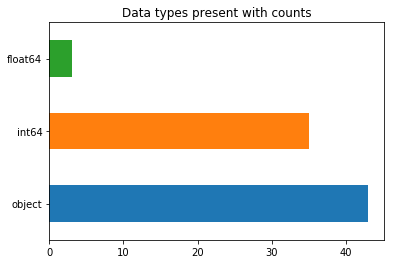

In [4]:
#Check the data types
train.dtypes.value_counts().plot(kind='barh')
plt.title('Data types present with counts')
plt.show()

In [5]:
#Describe data set
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Feature to predict
list(set(train.columns) - set(test.columns))

['SalePrice']

# 3. Data preprocessing

<ul>
    <li>First I'll replace the numeric missing values (NaN's) with 0 and non numeric with none.
    <li>Create Dummy variables for the categorical features.
    <li>transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal.
</ul>

## 3.1 Fill NaN values

In [7]:
#save and drop id
train_id = train["Id"]
train.drop(columns='Id',inplace=True)

test_id = test["Id"]
test.drop(columns='Id',inplace=True)

#select object columns
obj_col = train.columns[train.dtypes == 'object'].values

#select non object columns
num_col = train.columns[train.dtypes != 'object'].values
num_col_test = test.columns[test.dtypes != 'object'].values

#replace null value in obj columns with None
train[obj_col] = train[obj_col].fillna('None')
test[obj_col] = test[obj_col].fillna('None')

#replace null value in numeric columns with 0
train[num_col] = train[num_col].fillna(0)
test[num_col_test] = test[num_col_test].fillna(0)

## 3.2 Encoding ordinal features

In [8]:
#Ordinal features
ordinal_features = ["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure", 
                    "BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual", 
                    "FireplaceQu","GarageQual","GarageCond","PoolQC"]
train[ordinal_features].head(5)

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,None,TA,TA,None
1,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,SBrkr,TA,TA,TA,TA,None
2,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,SBrkr,Gd,TA,TA,TA,None
3,TA,TA,TA,Gd,No,ALQ,Unf,Gd,SBrkr,Gd,Gd,TA,TA,None
4,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,SBrkr,Gd,TA,TA,TA,None


In [9]:
#Map values
map_1 = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0}
map_2 = {"Gd":5,"Av":4,"Mn":3,"No":2,"None":1}
map_3 = {"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"None":0}
map_4 = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
map_5 = {"SBrkr":5,"FuseA":4,"FuseF":3,"FuseP":2,"Mix":1,"None":0}

#Encoding
train["ExterQual"] = train["ExterQual"].map(map_1)
train["ExterCond"] = train["ExterCond"].map(map_1)
train["BsmtQual"]  = train["BsmtQual"].map(map_1)
train["BsmtCond"]  = train["BsmtCond"].map(map_1)
train["BsmtExposure"] = train["BsmtExposure"].map(map_2)
train["BsmtFinType1"] = train["BsmtFinType1"].map(map_3)
train["BsmtFinType2"] = train["BsmtFinType2"].map(map_3)
train["HeatingQC"]   = train["HeatingQC"].map(map_4)
train["Electrical"]  = train["Electrical"].map(map_5)
train["KitchenQual"] = train["KitchenQual"].map(map_1)
train["FireplaceQu"] = train["FireplaceQu"].map(map_1)
train["GarageQual"]  = train["GarageQual"].map(map_1)
train["GarageCond"]  = train["GarageCond"].map(map_1)
train["PoolQC"]    = train["PoolQC"].map(map_1)

test["ExterQual"] = test["ExterQual"].map(map_1)
test["ExterCond"] = test["ExterCond"].map(map_1)
test["BsmtQual"]  = test["BsmtQual"].map(map_1)
test["BsmtCond"]  = test["BsmtCond"].map(map_1)
test["BsmtExposure"] = test["BsmtExposure"].map(map_2)
test["BsmtFinType1"] = test["BsmtFinType1"].map(map_3)
test["BsmtFinType2"] = test["BsmtFinType2"].map(map_3)
test["HeatingQC"]   = test["HeatingQC"].map(map_4)
test["Electrical"]  = test["Electrical"].map(map_5)
test["KitchenQual"] = test["KitchenQual"].map(map_1)
test["FireplaceQu"] = test["FireplaceQu"].map(map_1)
test["GarageQual"]  = test["GarageQual"].map(map_1)
test["GarageCond"]  = test["GarageCond"].map(map_1)
test["PoolQC"]   = test["PoolQC"].map(map_1)

In [10]:
#after encoding
train[ordinal_features].head(5)

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,2,6,1,5,5,4,0,3,3,0
1,3,3,4,3,5,5,1,5,5,3,3,3,3,0
2,4,3,4,3,3,6,1,5,5,4,3,3,3,0
3,3,3,3,4,2,5,1,4,5,4,4,3,3,0
4,4,3,4,3,4,6,1,5,5,4,3,3,3,0


## 3.3 Encode nominal features

In [11]:
#Nominal features
nominal_features = [x for x in obj_col if x not in ordinal_features]

train[nominal_features].head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Typ,Attchd,RFn,Y,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,Typ,Attchd,RFn,Y,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Typ,Attchd,RFn,Y,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,Typ,Detchd,Unf,Y,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Typ,Attchd,RFn,Y,None,None,WD,Normal


In [12]:
#Transfer object to int
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#for loop nominal feature column
for i in train[nominal_features].columns:
    #fit and transform each column and assign to itself
    train[i] = labelencoder.fit_transform(train[i])
    
#for loop nominal feature column
for i in test[nominal_features].columns:
    #fit and transform each column and assign to itself
    test[i] = labelencoder.fit_transform(test[i])
    
#Get dummy variable for nominal features
train = pd.get_dummies(train,columns=nominal_features,drop_first=True)
test = pd.get_dummies(test,columns=nominal_features,drop_first=True)

In [13]:
#Only for test set
#Check if any null values
print(train.isnull().any().sum())
print(test.isnull().any().sum())

#Get missing columns in the training test
missing_cols = set(train.drop(columns="SalePrice").columns) - set(test.columns)

#Add a missing column in test set with default value equal to 0
for cols in missing_cols:
    test[cols] = 0
    
#Ensure the order of column in the test set is in the same order than in train set
test = test[train.drop(columns="SalePrice").columns]

0
0


# 4. Feature Engineering

<br>FullBath: Full bathrooms above grade 
<br>HalfBath: Half baths above grade
<br>totalbath = FullBath + HalfBath

In [14]:
#TotalBath
train['TotalBath'] = (train['FullBath'] + (0.5 * train['HalfBath']) + 
                         train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
test['TotalBath'] = (test['FullBath'] + (0.5 * test['HalfBath']) + 
                         test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))

In [15]:
#HasPool
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['HasPool']  = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
#HasFireplaces
train['HasFirePlace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test['HasFirePlace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 5. Models

In [17]:
#Importing Packages
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## 5.1 Definitions

In [18]:
#define a evaluation function, Root Mean Squared Logarithmic Error (RMSLE)
def rmsle_score(train, pred):
    rmsle_score = (np.sum((np.log1p(train)-np.log1p(pred))**2)/len(pred))**0.5
    return rmsle_score

In [19]:
#Test Model
def test_model(model, X_train, y_train):
    rmsle  = make_scorer(rmsle_score)
    cv = KFold(n_splits=5,shuffle=True,random_state=45)
    rmsle_score_cv = cross_val_score(model, X_train, y_train, cv = cv ,scoring = rmsle)
    score=[rmsle_score_cv.mean()]
    
    return score

In [20]:
#Fit models
def fit_models(X_train, y_train):
    results={}
    
    model = linear_model.LinearRegression()
    results["Linear"]=test_model(model, X_train, y_train)
    
    model = linear_model.Ridge()
    results["Ridge"]=test_model(model, X_train, y_train)
    
    model = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(model, X_train, y_train)
    
    model = linear_model.HuberRegressor()
    results["Hubber"]=test_model(model, X_train, y_train)
    
    model = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(model, X_train, y_train)
    
    model = BaggingRegressor()
    results["Bagging"]=test_model(model, X_train, y_train)
    
    model = svm.SVR()
    results["SVM RBF"]=test_model(model, X_train, y_train)
    
    model = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(model, X_train, y_train)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Square Score"] 
    results = results.sort_values("Square Score", ascending=True)
    
    return results

## 5.2 Fit models

### 5.2.1 All models

In [21]:
# Split data to X(features) and y(target)
X = train.drop(columns="SalePrice")
y = train["SalePrice"]

In [22]:
#fit all models
fit_models(X, y)

,Square Score
Bagging,0.152135
Bayesian Ridge,0.167984
Ridge,0.180605
SVM Linear,0.197200
Linear,0.203053
Lasso,0.207258
Hubber,0.208308
SVM RBF,0.399660


### 5.2.2 Best model

In [23]:
#Split data to train dataset and validation dataset
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
#Create model
model = BaggingRegressor()

#Train the model using the val set
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print('RMSLE:', rmsle_score(y_val, y_pred))
print('MSE:', mean_squared_error(y_val, y_pred))

RMSLE: 0.15158295512407444
MSE: 1305995247.731507


# 6. Plot Results

In [25]:
#Importing Packages
from sklearn.decomposition import PCA

In [26]:
#reduction of dimensionality to plot
df = X_val

#Applying PCA
pca = PCA(n_components=1,whiten=True).fit(df)
dfPCA = pca.transform(df)

#Join Y val and predict
dfPCA = pd.DataFrame(dfPCA, columns = ['X'])
dfPCA['y_val'] = y.reset_index(drop=True)
dfPCA['y_pred'] = y_pred

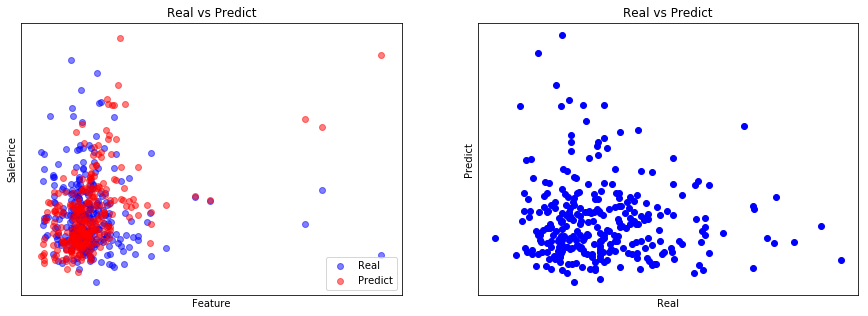

In [27]:
# Plot outputs

plt.figure(figsize=(15, 5)) #Chart size

#Chart Real and Predict
plt.subplot(1, 2, 1)
plt.scatter(dfPCA.X, dfPCA.y_val,  color='blue', label='Real', alpha=0.5)
plt.scatter(dfPCA.X, dfPCA.y_pred,  color='red', label='Predict', alpha=0.5)
plt.title("Real vs Predict")
plt.xlabel("Feature")
plt.ylabel("SalePrice")
plt.legend(loc='best')
plt.xticks(())
plt.yticks(())

#ChartReal vs Predict
plt.subplot(1, 2, 2)
plt.scatter(dfPCA.y_val, dfPCA.y_pred,  color='blue')
plt.title("Real vs Predict")
plt.xlabel("Real")
plt.ylabel("Predict")
plt.xticks(())
plt.yticks(())

plt.show()

# 7. Predic Test & Submission

In [28]:
# Split data to X(features)
test_X = test.values

y_pred_test = model.predict(test_X)

submission = pd.DataFrame({'Id':test_id,'SalePrice':y_pred_test})

# Save results
submission.to_csv("submission.csv",index=False)